<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_12_04_%ED%91%9C%EB%B3%B8%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 1. 표본평균의 표본분포

* 표본분포: 모집단에서 일정한 크기의 모든 가능한 표본을 추출하였을때 그 모든 표본으로부터 계산된 통계량의 확률분포

In [ ]:
# 데이터 생성

s_x = np.linspace(-5, 100, 1000)
s_df = pd.Series(s_x)
s_df

0       -5.000000
1       -4.894895
2       -4.789790
3       -4.684685
4       -4.579580
          ...    
995     99.579580
996     99.684685
997     99.789790
998     99.894895
999    100.000000
Length: 1000, dtype: float64

In [ ]:
### 각 샘플 수에 따른 1000개 평균 계산

sample_data = pd.DataFrame({
    'dist' : s_df.sample(1000),
    'type' : 'Data',
})
sample_mean_05 = pd.DataFrame({
    'dist' : [s_df.sample(5).mean() for _ in range(1000)],
    'type' : '5개 샘플평균',
})
sample_mean_10 = pd.DataFrame({
    'dist' : [s_df.sample(10).mean() for _ in range(1000)],
    'type' : '10개 샘플평균',
})
sample_mean_20 = pd.DataFrame({
    'dist' : [s_df.sample(20).mean() for _ in range(1000)],
    'type' : '20개 샘플평균',
})
sample_mean_30 = pd.DataFrame({
    'dist' : [s_df.sample(30).mean() for _ in range(1000)],
    'type' : '30개 샘플평균',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_10, sample_mean_20, sample_mean_30])
results

,dist,type
229,19.069069,Data
279,24.324324,Data
619,60.060060,Data
923,92.012012,Data
931,92.852853,Data
...,...,...
995,37.364364,30개 샘플평균
996,43.849349,30개 샘플평균
997,51.942442,30개 샘플평균
998,62.085085,30개 샘플평균


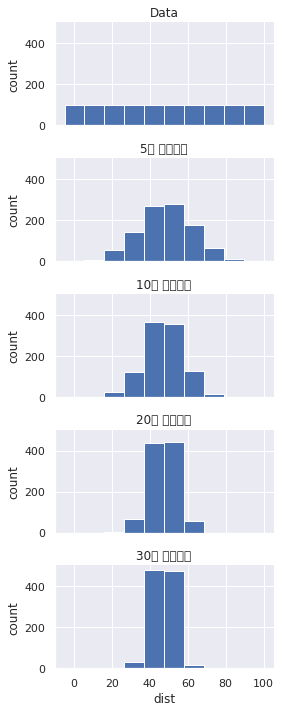

In [ ]:
# 샘플 수에 따른 표본평균의 시각롸

g = sns.FacetGrid(results, col = "type", col_wrap = 1,
                  height = 2, aspect = 2)

g.map(plt.hist, "dist", range = [-5, 100], bins =10)
g.set_axis_labels('dist', "count")
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### 2. 중심극한정리

#### 2-1 정규분포

In [ ]:
## 기댓값이 50이고 표준편차가 10인 정규분포
# 구간 내에 숫자를 균일한 간격으로 생성(x축)

norm = stats.norm(loc = 50, scale = 10)

# -10 ~ 120까지 2000개 생성

s_x = np.linspace(-10,120,2000)

# 확률밀도함수

s_pdf = norm.pdf(s_x)

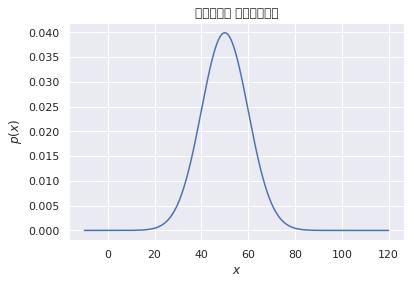

In [ ]:
# 정규분포 시각화

plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

#### 2-2 중심극한정리

* 모집단에 대한 샘플링 횟수가 늘어날수록 그 표본들의 평균은 모집단의 평균을 중심으로 정규분포를 띄게 되는 현상

In [ ]:
## 동전을 던지는 실험
# 동전을 던졌을때 앞면과 뒷면이 나오는 경우의 표본 데이터(n=100)를 10회 수집

bag_of_mean = []

for i in range(10):
  m = np.random.binomial(n = 1, p = 0.5, size = 100).mean()
  bag_of_mean.append(m)

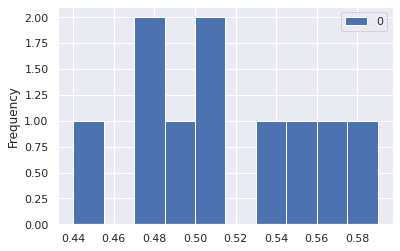

In [ ]:
pd.DataFrame(bag_of_mean).plot.hist()

In [ ]:
# 동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본데이터(n = 100)를 500회 수집

bag_of_mean = []

for i in range(500):
  m = np.random.binomial(n = 1, p = 0.5, size = 100).mean()
  bag_of_mean.append(m)

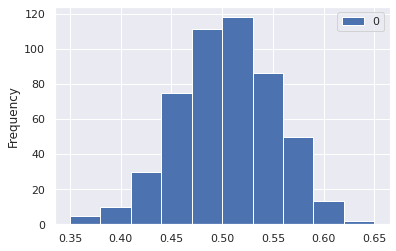

In [ ]:
pd.DataFrame(bag_of_mean).plot.hist()

In [ ]:
# 동전을 던졌을 때 앞면과 뒷면이 나오는 경우의 표본데이터(n = 100)를 1000회 수집

bag_of_mean = []

for i in range(1000):
  m = np.random.binomial(n = 1, p = 0.5, size = 100).mean()
  bag_of_mean.append(m)

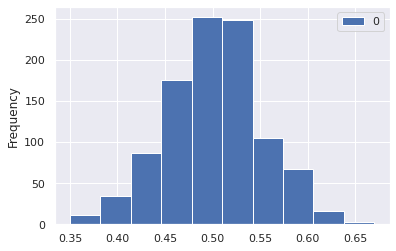

In [ ]:
pd.DataFrame(bag_of_mean).plot.hist()

##### QQ-Plot : 정규성 검정

* 수집 데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프
* 집단이 정규성을 따른다면 직선으로 표현

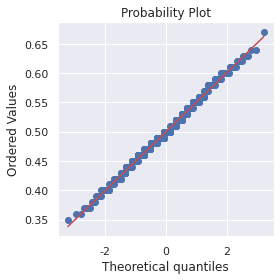

In [ ]:
## 위 동전실험 사례에 샘플 1000개는 정규성을 그린다고 판단

fig, ax = plt.subplots(figsize = (4, 4))

# norm_sample = stats.norm.rvs(size = 100)
stats.probplot(bag_of_mean, plot = ax)

plt.tight_layout()
plt.show()

#### 2-3 t-분포

* 모분산(표준편차)이 알려져 있지 않고, 표본이 충분하지 못한 경우(n < 30)는 정규분포보다 예측범위가 넓은 t분포를 사용

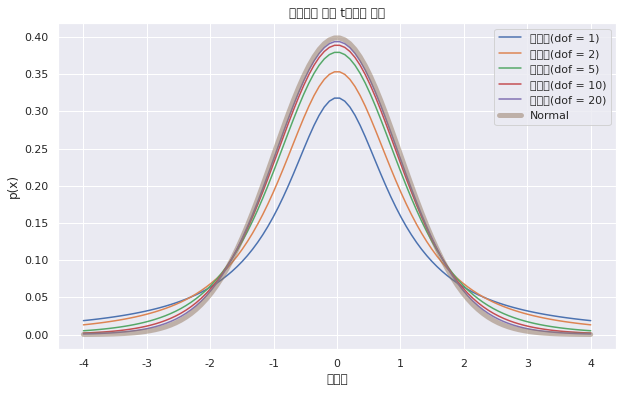

In [ ]:
### 자유도에 따른 t분포 확인

t_data = np.linspace(-4, 4, 100)

# 플롯 사이즈 지정

plt.figure(figsize = (10,6))

for dof in [1, 2, 5, 10, 20]:
  t_dist = stats.t(df = dof)
  plt.plot(t_data, t_dist.pdf(t_data), label = ('자유도(dof = %d)') % dof)

plt.plot(t_data, stats.norm().pdf(t_data), label = "Normal", lw = 5, alpha = 0.5)
plt.title('자유도에 따른 t분포의 변화')
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

### 3. 표본분산의 분포

* 모집단이 1개인 경우 카이제곱통계량 산출
* 모집단이 2개인 경우 f통계량 산출(2집단 산포 비교, 분산비 사용)

#### 3-1 카이제곱분포

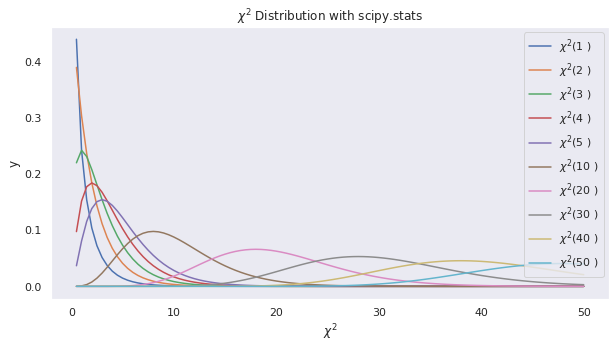

In [ ]:
### 카이제곱분포 표현
from scipy.stats import chi2

# 라인스페이스 x축 설정

chi_x = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화

plt.figure(figsize = (10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
  plt.plot(chi_x, chi2(dof).pdf(chi_x),
           label = r'$\chi^2$(' + str(dof) + ' )')
  
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

### 3-2 F분포

* 카이제곱분포 2개의 비율확률분포
* 두 집단의 산포를 비교하는데 사용

In [ ]:
f_data = np.linspace(0.05, 3, 1000)

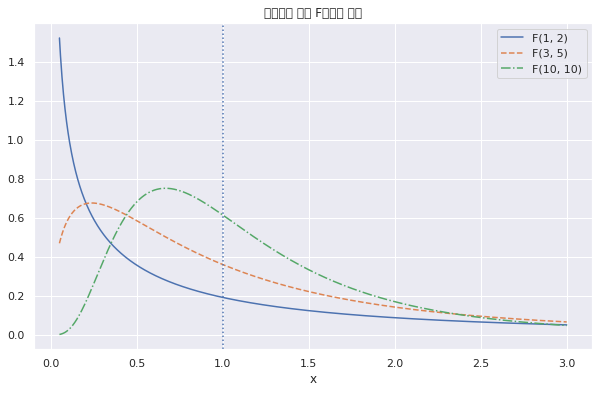

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(f_data, stats.f(1,2).pdf(f_data), ls = "-", label = "F(1, 2)")
plt.plot(f_data, stats.f(3,5).pdf(f_data), ls = "--", label = "F(3, 5)")
plt.plot(f_data, stats.f(10,10).pdf(f_data), ls = "-.", label = "F(10, 10)")
plt.axvline(1, ls = ":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()